In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
zip_adres = "/content/drive/MyDrive/archive.zip"
!cp "{zip_adres}" .

In [ ]:
!unzip -q archive.zip

In [ ]:
import numpy as np  
import os
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential

In [ ]:
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
KATEGORILER = ["battery","brown-glass","white-glass","cardboard","clothes","green-glass","metal","paper",
               "plastic","shoes","trash","biological"]
DIR = "garbage_classification"
BOYUT = 150
veri = []

for kategori in KATEGORILER:
  klasor_adresi = os.path.join(DIR,kategori)
  deger = KATEGORILER.index(kategori)
  for resim_adi in os.listdir(klasor_adresi):
    resim_adresi = os.path.join(klasor_adresi,resim_adi)
    resim = cv2.imread(resim_adresi, cv2.IMREAD_COLOR)
    resim = cv2.resize(resim,(BOYUT,BOYUT))
    veri.append([resim,deger])

In [ ]:
X=[] #train_images
Y=[] #train_labels

for x,y in veri:
  X.append(x)
  Y.append(y)

del veri


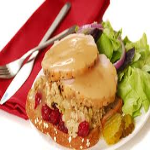

In [ ]:
cv2_imshow(resim)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
import numpy

X_train = numpy.array(X_train).reshape(-1,BOYUT,BOYUT,3) #images
X_test = numpy.array(X_test).reshape(-1,BOYUT,BOYUT,3)
Y_train = numpy.array(Y_train).reshape(-1,1) #labels
Y_test  = numpy.array(Y_test).reshape(-1,1)

In [ ]:
X_train = X_train / 255.0

In [ ]:
from keras.utils import to_categorical
Y_train= to_categorical(Y_train, num_classes=len(np.unique(Y_train)))
Y_test= to_categorical(Y_test, num_classes=len(np.unique(Y_test)))

0


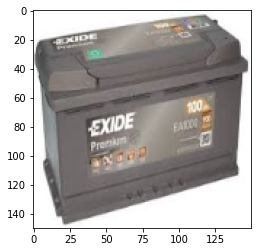

In [ ]:
plt.imshow(X[16],cmap="gray")
print(Y[16])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)



In [ ]:
from keras import layers
import keras

In [ ]:
from keras.applications import VGG19
from keras.models import Model
vgg = VGG19(input_shape = (150,150,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(12, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history=model.fit(datagen.flow(X_train, Y_train, batch_size=32,subset='training'),validation_data=datagen.flow(X_train, Y_train,batch_size=32, subset='validation'),steps_per_epoch=176, epochs=15)

Epoch 1/15
176/176 [==============================] - 67s 320ms/step - loss: 1.7635 - accuracy: 0.4674 - val_loss: 1.3005 - val_accuracy: 0.6312
Epoch 2/15
176/176 [==============================] - 52s 293ms/step - loss: 1.1272 - accuracy: 0.6884 - val_loss: 1.0322 - val_accuracy: 0.7035
Epoch 3/15
176/176 [==============================] - 52s 296ms/step - loss: 0.9284 - accuracy: 0.7371 - val_loss: 0.9256 - val_accuracy: 0.7213
Epoch 4/15
176/176 [==============================] - 52s 293ms/step - loss: 0.8147 - accuracy: 0.7636 - val_loss: 0.8206 - val_accuracy: 0.7546
Epoch 5/15
176/176 [==============================] - 52s 296ms/step - loss: 0.7439 - accuracy: 0.7841 - val_loss: 0.7778 - val_accuracy: 0.7582
Epoch 6/15
176/176 [==============================] - 52s 293ms/step - loss: 0.6888 - accuracy: 0.8002 - val_loss: 0.7450 - val_accuracy: 0.7766
Epoch 7/15
176/176 [==============================] - 51s 286ms/step - loss: 0.6570 - accuracy: 0.8039 - val_loss: 0.6954 - val_ac

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
14/14 [==============================] - 15s 705ms/step - loss: 10.3006 - accuracy: 0.7862
test loss, test acc: [10.300628662109375, 0.7861599326133728]


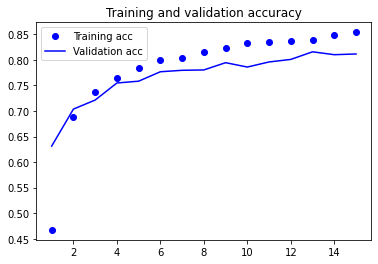

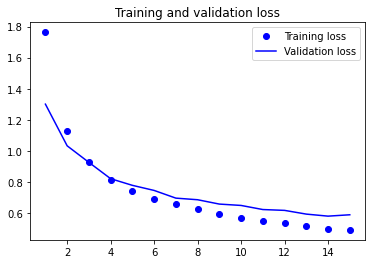

In [ ]:
acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()